![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Data loading and Data Analysis 

4. Visualize and Standardize the data

5. Model Building

6. Evaluate Model

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

2.4.1


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Data loading and Data Analysis 

### Read images and save the pixel information to an array. Also, save their corresponding label to a list ( YES-Mobile - 1, NO-Mobile - 0). Resize the images to shape (128, 128, 3).

In [10]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/")
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Colab Notebooks/mobile-images.zip', 'r') as z:
  z.extractall()

### Check shape and size of the images

In [20]:
path = "/content/drive/MyDrive/Colab Notebooks/"
nophones = os.listdir(path + "mobile-images/no-mobile")
yesphones = os.listdir(path + "mobile-images/yes-mobile")
print("Count of images with no mobile phones", len(nophones))
print("Count of images with mobile phones",len(yesphones))

Count of images with no mobile phones 121
Count of images with mobile phones 124


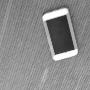

In [18]:
import cv2
img = cv2.imread(path + "mobile-images/yes-mobile/" + yesphones[0])
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [23]:
img.size

24300

In [24]:
img.shape

(90, 90, 3)

###  What is the percentage of images with and without mobile phone in the data

In [21]:
print ("% of images with mobile phones", len(yesphones) / (len(yesphones) + len(nophones)) * 100)
print ("% of images without mobile phones", len(nophones) / (len(yesphones) + len(nophones)) * 100)

% of images with mobile phones 50.61224489795918
% of images without mobile phones 49.38775510204081


### Concatenate above two arrays (array having image details of with and without mobile) into one variable and check the final size of the data
### Concatenate lists having label data into one list

In [28]:
yesimg = []
y_yes = []

yes_path = "/content/drive/MyDrive/Colab Notebooks/mobile-images/yes-mobile/"

for img in os.listdir(yes_path):
  img = cv2.imread(yes_path + img)
  img = cv2.resize(img, (128,128))
  yesimg.append(img)
  y_yes.append(1)
  

In [33]:
noimg = []
n_no = []

no_path = "/content/drive/MyDrive/Colab Notebooks/mobile-images/no-mobile/"

for img in os.listdir(no_path):
  img = cv2.imread(no_path + img)
  img = cv2.resize(img, (128,128))
  noimg.append(img)
  n_no.append(0)

In [60]:
images = np.concatenate((yesimg, noimg), axis=0)
labels = np.concatenate((y_yes, n_no), axis=0)

In [65]:
images[0].shape

(128, 128, 3)

### Shuffle the above data and labels ( Data and label should be in sync)

In [67]:
from sklearn.utils import shuffle
images, labels = shuffle(images, labels)

## 4. Visualize and Standardize the data

### Visualise the first 10 images in the data and print their corresponding labels.

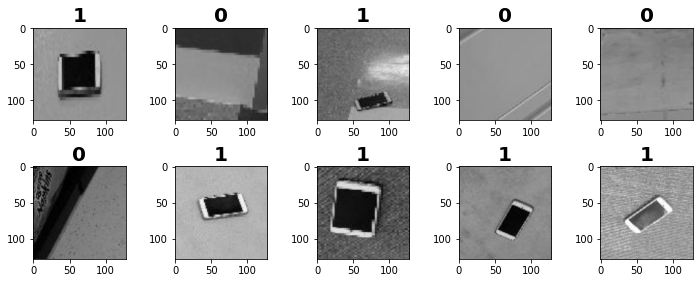

In [74]:
def plot_images(images, labels, num_row=4, num_col=6):
   
    fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
    for i in range(0,num_row * num_col):
        ax = axes[i//num_col, i%num_col]       
        ax.imshow(images[i], cmap="gray")
        ax.set_title(labels[i],weight='bold',fontsize=20)
    plt.tight_layout()    
    plt.show()

plot_images(images,labels, num_row=2, num_col=5)

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3)

### Print shape of the X train and X test data

In [91]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])

X_train shape: (171, 128, 128, 3)
Images in X_train: 171
Images in X_test: 74


### Normalize the data by dividing by 255

In [132]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

###  One hot encode the labels for train and test data 
Hint:- We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [133]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [95]:
y_test[0]

array([0., 1.], dtype=float32)

## 5. Model building

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [134]:
input_shape = (128,128,3)

num_classes = 2

model = Sequential() 

model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model.add(MaxPooling2D())

model.add(Conv2D(filters = 64, kernel_size=(5, 5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(256, activation='relu')) 

model.add(Dense(num_classes, activation='softmax'))

In [135]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 59, 59, 64)        51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 29, 29, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 53824)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               13779200  
_________________________________________________________________
dense_10 (Dense)             (None, 2)                

### Compile the above model using appropriate loss metric. Try with sgd, adam optimizer and "accuracy" as metrics. 

In [136]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [137]:
training_history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/50
11/11 [==============================] - 1s 45ms/step - loss: 2.6193 - accuracy: 0.4654 - val_loss: 0.6690 - val_accuracy: 0.6622
Epoch 2/50
11/11 [==============================] - 0s 18ms/step - loss: 0.6327 - accuracy: 0.8270 - val_loss: 1.5579 - val_accuracy: 0.4459
Epoch 3/50
11/11 [==============================] - 0s 17ms/step - loss: 0.6991 - accuracy: 0.7183 - val_loss: 0.4172 - val_accuracy: 0.7973
Epoch 4/50
11/11 [==============================] - 0s 18ms/step - loss: 0.3506 - accuracy: 0.9065 - val_loss: 0.4392 - val_accuracy: 0.8378
Epoch 5/50
11/11 [==============================] - 0s 19ms/step - loss: 0.2792 - accuracy: 0.9370 - val_loss: 0.4093 - val_accuracy: 0.7973
Epoch 6/50
11/11 [==============================] - 0s 18ms/step - loss: 0.1585 - accuracy: 0.9504 - val_loss: 0.3991 - val_accuracy: 0.8514
Epoch 7/50
11/11 [==============================] - 0s 18ms/step - loss: 0.1178 - accuracy: 0.9674 - val_loss: 0.7000 - val_accuracy: 0.8108
Epoch 8/50
11

## 6. Evaluate the model


### Evaluate the model on test data and print loss and accuracy

In [138]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 0s 8ms/step - loss: 1.6695 - accuracy: 0.8243
Test loss: 1.6695047616958618
Test accuracy: 0.8243243098258972


### Predict label data of the test data and check confusion matrix

In [139]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [140]:
predictions

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0])

In [141]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0])

In [142]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        33
           1       0.94      0.73      0.82        41

    accuracy                           0.82        74
   macro avg       0.84      0.84      0.82        74
weighted avg       0.85      0.82      0.82        74

[[31  2]
 [11 30]]


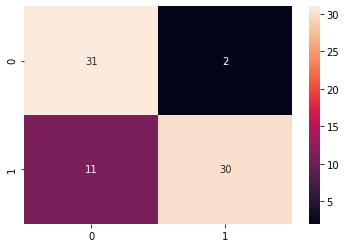

In [143]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

### Display test images and their predicted label for a few samples

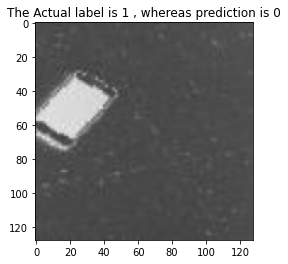

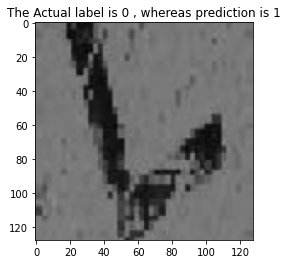

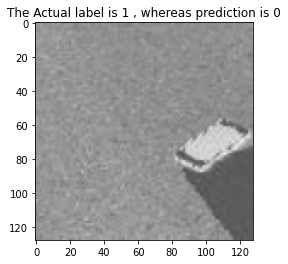

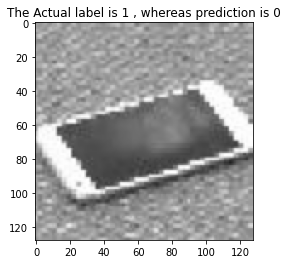

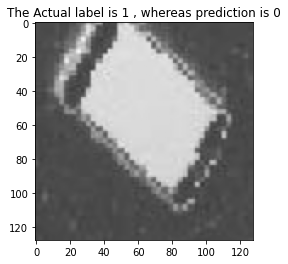

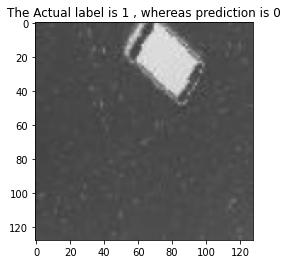

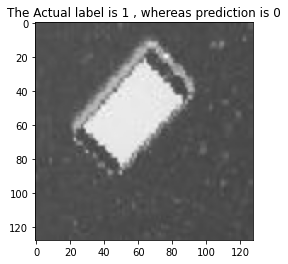

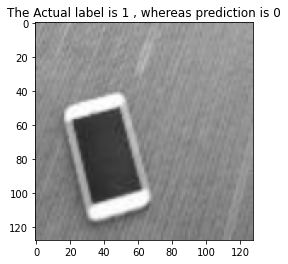

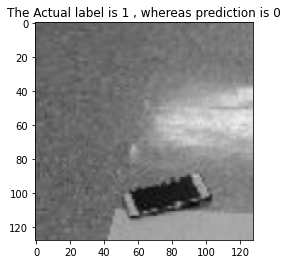

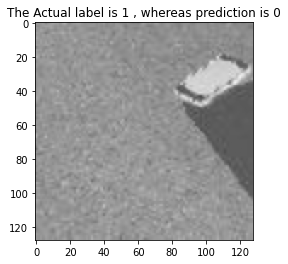

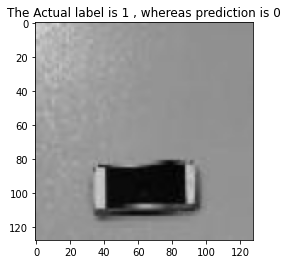

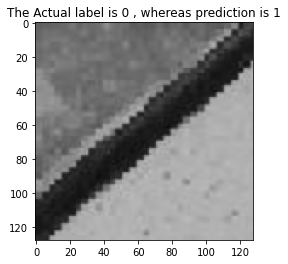

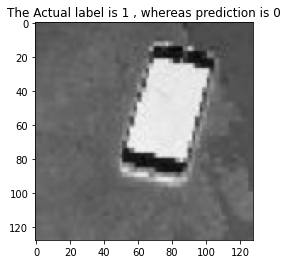

In [144]:
for i in range(len(y_test)):
  if y_test[i] != predictions[i] :
    plt.imshow(X_test[i])
    plt.title("The Actual label is {} , whereas prediction is {}".format(y_test[i], predictions[i] ))
    plt.show()

### Print following plots
1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

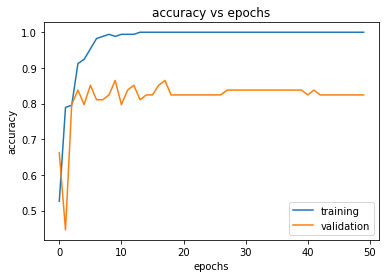

In [145]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('accuracy vs epochs')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'])
plt.show()

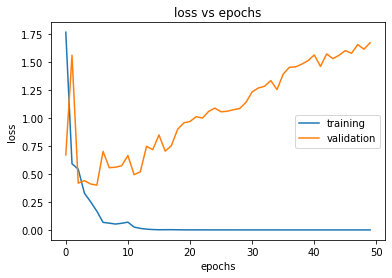

In [146]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'])
plt.show()

## 7.  Conclusion and Interpretation

### Write your observations and findings

The model is overfitting as the training accuracy is 1 but the test accuracy does not go beyond 82.4. Also the training loss keeps decreasing, but the validation loss increases after certain epochs, so early stopping can be used to stop the training. The parameters of the model have to be tweaked to reduce the overfitting, so that training and test accuracy are closer.

## 8. Further Explore

### Try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the previous network